# Yasin Ünal

In [1]:
import numpy as np
import cv2
from skimage.util import random_noise
import matplotlib.pyplot as plt


### Resim bilgisinin okunması 

OpenCV kütüphanesi kullanılarak /peppers.png resmi okunur ve gösterilir.



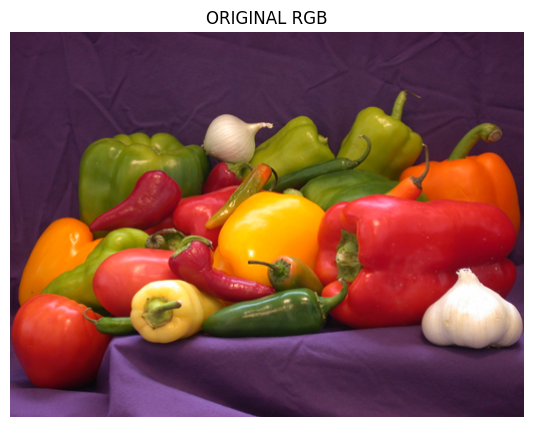

In [5]:
# READ THE RGB IMAGE
image = cv2.imread('peppers.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.title('ORIGINAL RGB')
plt.axis('off') 
plt.show()

### Salt&Pepper Noise

Orjinal resme Salt&Pepper Noise eklenir. Salt&Pepper Noise, resimde rastgele piksellerin beyaz veya siyah olmasına neden olan bir tür gürültüdür. Bu gürültü, resimde noktaların oluşmasına neden olur. 

Kullanım amacı :  Resim işleme algoritmalarının performansını test etmek için kullanılır. 

İşlem için ***skimage.util*** kütüphanesinden ***random_noise*** fonksiyonu kullanılmıştır.


C:\Users\Yasin\AppData\Local\Temp\ipykernel_21080\2604289756.py:1: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  noisy_image = random_noise(image, mode='s&p', seed=None, clip=True)


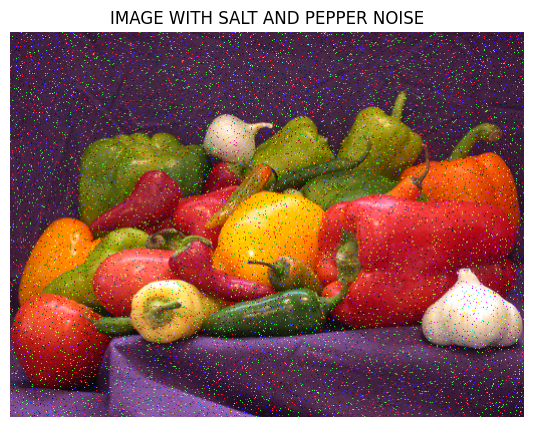

In [6]:
noisy_image = random_noise(image, mode='s&p', seed=None, clip=True)
noisy_image = (noisy_image * 255).astype(np.uint8)  # Convert to 

plt.figure(figsize=(10, 5))
plt.imshow(noisy_image )
plt.title('IMAGE WITH SALT AND PEPPER NOISE')
plt.axis('off') 
plt.show()

### Medyan Filtreleme 

Gürültü eklenmiş olan resim Medyan filtreleme ile temizlenir. Medyan filtreleme, bir pikselin değerini, pikselin etrafındaki piksellerin medyanı ile değiştirir. Bu filtreleme, gürültülü pikselleri temizlerken, resimdeki kenarları korur.
Bu işlem için pencere boyutu 3x3 olarak seçilmiştir.

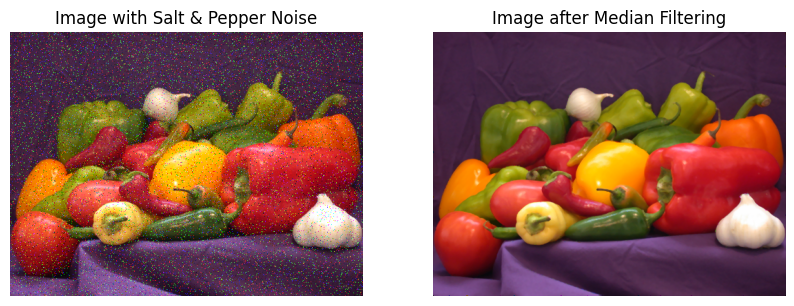

In [7]:
# DEFINE THE WINDOW SİZE M*N
M, N = 3, 3

# PAD THE MATRIX WITH ZEROS ON ALL SIDES h
pad_size = M // 2
padded_image = np.pad(noisy_image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')
filtered_image = np.zeros_like(noisy_image)


for i in range(noisy_image.shape[0]): # satır
    for j in range(noisy_image.shape[1]): # sütun
        # RED,GREEN AND BLUE CHANNELS ARE TRAVERSED SEPARATELY
        for k in range(3):  # RGB
            temp = padded_image[i:i+M, j:j+N, k]
            filtered_image[i, j, k] = np.median(temp)
# Display input and output images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(noisy_image)
ax[0].set_title('Image with Salt & Pepper Noise')
ax[0].axis('off')

ax[1].imshow(filtered_image)
ax[1].set_title('Image after Median Filtering')
ax[1].axis('off')

plt.show()


Bu işlem gürültü içeren resim matrisinin satırları (i) ve sütunları (j) arasında gezinirken M x N boyutundaki penceredeki pikselleri inceler.  i,j noktasındaki pikselin değerini, penceredeki piksellerin medyan değeri ile günceller. Böylece gürültü temizlenmiş olur.  